In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold,KFold

%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train=pd.read_csv("/content/drive/MyDrive/Data/ZindiTrain.csv")


In [ ]:
train.head()

,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,105.0,61.0,271.0,3420.0,1671.0,11675867.0,39.0,1343.0,448.0,2237.0,124.0,330.0,331.0,2515.0,120.0,506133.0,1326610.0,1159677.0,8406185.0,281329.0,11681999.0,3.6,69.0,2.7,3.6,3.3,66.0,0.007118,1.0,606.0,2.0,1.0,1.0,2.0,5.0,4422,1.434516,2.818066e+11,9428.279323
1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,531.0,103.0,533.0,1491.0,242.0,5917814.0,195.0,1070.0,671.0,3888.0,1.0,52.0,315.0,1100.0,23.0,1320.0,381117.0,1706376.0,3754815.0,80010.0,5924770.0,3.7,1.0,2.0,2.0,1.0,43.5,0.009419,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267
2,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,1152.0,187.0,905.0,9346.0,4013.0,47778746.0,104.0,2014.0,1099.0,11476.0,331.0,923.0,864.0,6786.0,442.0,9848462.0,5178557.0,2145663.0,25510267.0,5110490.0,47796942.0,3.7,22.0,3.1,3.0,3.3,65.5,0.013530,1.0,692.0,3.0,1.0,1.0,NaN,NaN,10602,4.942448,1.530712e+12,49120.738484
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,424.0,268.0,443.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,NaN,NaN
4,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,42.0,50.0,173.0,3262.0,1652.0,14422172.0,21.0,511.0,190.0,2284.0,86.0,280.0,443.0,2284.0,169.0,311017.0,1977833.0,731277.0,10964321.0,440730.0,14426405.0,3.7,22.0,4.7,3.8,4.4,83.0,0.010332,1.0,749.0,2.0,1.0,1.0,NaN,2.0,3996,2.609576,3.386925e+11,10384.798216


In [ ]:

train.drop(['id','asset_id'],axis=1,inplace=True)
cols = train.columns

In [ ]:
##Used strategy 'mean' in SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
train = pd.DataFrame(imp_mean.fit_transform(train))
train.columns = cols

In [ ]:
train.head()

,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,105.0,61.0,271.0,3420.0,1671.0,11675867.0,39.0,1343.0,448.0,2237.0,124.0,330.0,331.0,2515.0,120.0,506133.0,1326610.0,1159677.0,8406185.0,281329.0,11681999.0,3.6,69.0,2.7,3.6,3.3,66.0,0.007118,1.0,606.0,2.0,1.0,1.0,2.0,5.0,4422,1.434516,2.818066e+11,9428.279323
1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,531.0,103.0,533.0,1491.0,242.0,5917814.0,195.0,1070.0,671.0,3888.0,1.0,52.0,315.0,1100.0,23.0,1320.0,381117.0,1706376.0,3754815.0,80010.0,5924770.0,3.7,1.0,2.0,2.0,1.0,43.5,0.009419,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267
2,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,1152.0,187.0,905.0,9346.0,4013.0,47778746.0,104.0,2014.0,1099.0,11476.0,331.0,923.0,864.0,6786.0,442.0,9848462.0,5178557.0,2145663.0,25510267.0,5110490.0,47796942.0,3.7,22.0,3.1,3.0,3.3,65.5,0.013530,1.0,692.0,3.0,1.0,1.0,NaN,NaN,10602,4.942448,1.530712e+12,49120.738484
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,424.0,268.0,443.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,NaN,NaN
4,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,42.0,50.0,173.0,3262.0,1652.0,14422172.0,21.0,511.0,190.0,2284.0,86.0,280.0,443.0,2284.0,169.0,311017.0,1977833.0,731277.0,10964321.0,440730.0,14426405.0,3.7,22.0,4.7,3.8,4.4,83.0,0.010332,1.0,749.0,2.0,1.0,1.0,NaN,2.0,3996,2.609576,3.386925e+11,10384.798216


In [ ]:
Y = train['close']
X = train.drop('close',axis=1)
train.shape

(12632, 47)

# **FEATURE** **SELECTION** **TECHNIQUES** 

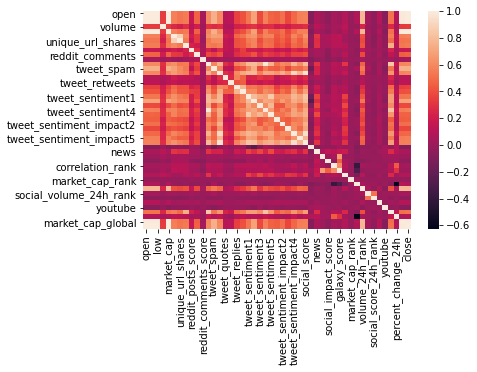

In [ ]:
##Using heatmaps
sns.heatmap(train.corr())

**MUTUAL_INFO** **REGRESSION**

In [ ]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X,Y)
mutual_info


array([3.59592638, 4.19477733, 4.190531  , 0.99795304, 3.59380933,
       0.72210379, 0.70968036, 0.4872065 , 0.1437704 , 0.44373556,
       0.24728858, 0.89046835, 1.10969729, 0.78418099, 0.6697727 ,
       0.68794254, 0.68428955, 0.76594347, 0.77314005, 1.0595225 ,
       0.71986171, 0.91096859, 0.79603473, 0.75301786, 0.83047353,
       0.66457378, 0.75419736, 0.84831117, 0.78572258, 0.27530769,
       0.64668931, 0.44676854, 0.78953103, 0.58962321, 0.54583729,
       0.90912632, 0.00446852, 0.52774036, 0.32165719, 0.03447157,
       0.01415217, 0.04113342, 0.26235727, 0.92169998, 0.59412585,
       2.86470191])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

high                       4.194777
low                        4.190531
open                       3.595926
market_cap                 3.593809
market_cap_global          2.864702
tweet_spam                 1.109697
tweet_sentiment2           1.059522
volume                     0.997953
social_volume              0.921700
tweet_sentiment4           0.910969
volatility                 0.909126
tweets                     0.890468
tweet_sentiment_impact5    0.848311
tweet_sentiment_impact2    0.830474
tweet_sentiment5           0.796035
social_impact_score        0.789531
social_score               0.785723
tweet_followers            0.784181
tweet_sentiment1           0.773140
tweet_favorites            0.765943
tweet_sentiment_impact4    0.754197
tweet_sentiment_impact1    0.753018
url_shares                 0.722104
tweet_sentiment3           0.719862
unique_url_shares          0.709680
tweet_retweets             0.687943
tweet_replies              0.684290
tweet_quotes               0

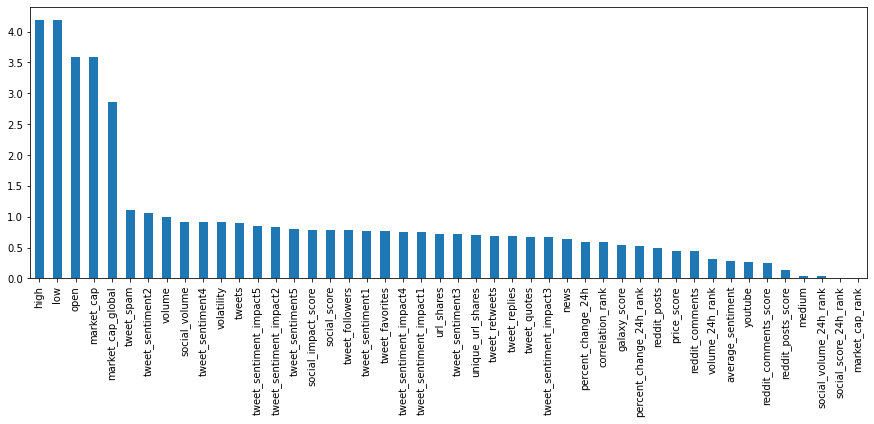

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [ ]:
from sklearn.feature_selection import SelectPercentile
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X,Y)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x7f029da587a0>)

In [ ]:
list = X.columns[selected_top_columns.get_support()]
list

Index(['open', 'high', 'low', 'volume', 'market_cap', 'tweet_spam',
       'tweet_sentiment2', 'social_volume', 'market_cap_global'],
      dtype='object')

In [ ]:
X_mutual = X.loc[: , list]

In [ ]:
X_mutual.head()

,open,high,low,volume,market_cap,tweet_spam,tweet_sentiment2,social_volume,market_cap_global
0,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1671.0,330.0,4422.0,2.818066e+11
1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,242.0,52.0,2159.0,2.126897e+11
2,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,4013.0,923.0,10602.0,1.530712e+12
3,9671.831848,9689.751652,9648.410207,9.820621e+08,1.755833e+11,811.0,253.5,285.0,2.716129e+11
4,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1652.0,280.0,3996.0,3.386925e+11


In [ ]:
scaler = MinMaxScaler()
X_mutual_scaled = pd.DataFrame(scaler.fit_transform(X_mutual))

In [ ]:

X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled.columns = X.columns
X_scaled.head()

,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
0,0.085780,0.085014,0.090757,0.009218,0.084984,0.166947,0.167077,0.108216,0.003436,0.045045,0.001327,0.023047,0.119495,0.017645,0.000642,0.003010,0.011826,0.003530,0.033586,0.042362,0.030690,0.017438,0.022441,0.008691,0.012514,0.016278,0.019471,0.003163,0.018744,0.761905,0.064333,0.425,0.65,0.575,0.574257,0.007493,0.0,0.352855,0.111111,0.0,0.0,0.090909,0.022599,0.031482,0.579294,0.082205
1,0.060500,0.059777,0.065139,0.003160,0.055590,0.090846,0.111111,0.038076,0.017376,0.076577,0.002610,0.009163,0.015817,0.008391,0.003208,0.002397,0.017712,0.006138,0.000271,0.006126,0.029095,0.007044,0.003676,0.000023,0.003579,0.024417,0.008321,0.000859,0.009506,0.809524,0.000000,0.250,0.25,0.000,0.128713,0.010607,0.0,0.508785,0.111111,0.0,0.0,0.000000,0.005650,0.015367,0.530388,0.046575
2,0.785331,0.787188,0.788664,0.053863,0.787877,0.142900,0.199467,0.142285,0.037698,0.139640,0.004431,0.065702,0.289414,0.075665,0.001711,0.004517,0.029010,0.018123,0.089653,0.119656,0.083798,0.048811,0.084736,0.169103,0.048913,0.030956,0.060468,0.058442,0.076690,0.809524,0.019868,0.525,0.50,0.575,0.564356,0.016170,0.0,0.415813,0.222222,0.0,0.0,0.000000,0.005650,0.075490,0.623350,0.726011
3,0.090158,0.089604,0.094728,0.014427,0.086706,0.111034,0.143706,0.032064,0.013875,0.200450,0.002169,0.024480,0.057099,0.021513,0.001152,0.001972,0.009701,0.004314,0.027627,0.032391,0.053208,0.016763,0.034823,0.005757,0.010483,0.024477,0.022040,0.006140,0.022603,0.809524,0.021760,0.500,0.70,0.550,0.613861,0.013008,0.0,0.508785,0.111111,0.0,0.0,0.000000,0.005650,0.002022,0.564296,0.076950
4,0.105351,0.104467,0.107691,0.017681,0.102350,0.099951,0.130381,0.046092,0.001374,0.036787,0.000847,0.021910,0.118117,0.022058,0.000345,0.001141,0.005015,0.003604,0.023294,0.035845,0.041849,0.015741,0.031921,0.005340,0.018667,0.009901,0.025602,0.004988,0.023147,0.809524,0.019868,0.925,0.70,0.850,0.910891,0.011843,0.0,0.457540,0.111111,0.0,0.0,0.000000,0.005650,0.028448,0.594051,0.111529


**CUSTOM** **CORRELATION** 
 **FUNCTION**



In [ ]:
threshold = 0.8

def high_cor_function(df):
    cor = train.corr()
    corrm = np.corrcoef(train.transpose())
    corr = corrm - np.diagflat(corrm.diagonal())
    print("max corr:",corr.max(), ", min corr: ", corr.min())
    c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
    high_cor = c1[c1.values!=1]    
    thresh = threshold 
    display(high_cor[high_cor>thresh])

In [ ]:
high_cor_function(X_scaled)

max corr: 0.99997242468321 , min corr:  -0.6253723786427692


close              high                       0.999972
open               high                       0.999965
                   low                        0.999962
close              low                        0.999958
open               close                      0.999939
low                high                       0.999935
market_cap         market_cap_global          0.998996
                   high                       0.987029
close              market_cap                 0.986997
open               market_cap                 0.986968
market_cap         low                        0.986947
market_cap_global  low                        0.985792
                   close                      0.985759
                   open                       0.985735
high               market_cap_global          0.985716
tweet_sentiment4   tweets                     0.983618
social_score       tweet_followers            0.965611
                   tweet_sentiment_impact4    0.948599
tweet_foll

# **PCA**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
X=pd.DataFrame(pca.fit_transform(X))
X.head()

,0,1,2,3,4
0,-2.102041e+11,3.923284e+09,-3.309293e+08,-2.968546e+06,-3.609436e+05
1,-2.855814e+11,-3.869015e+09,-6.192121e+08,-1.193533e+07,-8.480491e+04
2,1.242882e+12,-1.228131e+10,2.797724e+08,-3.162113e+07,3.102846e+06
3,-6.770476e-05,6.555676e-05,-1.237657e-03,-2.657178e-01,-2.611578e-01
4,-1.517854e+11,1.657792e+10,1.355662e+08,4.204179e+06,-1.508155e+06


In [ ]:
import pickle
pickle.dump(pca, open("pca1.pkl","wb"))


### **EVALUATION**

In [ ]:
X.drop(['market_cap_global','tweet_sentiment1','tweet_sentiment4','social_score','volume_24h_rank'],axis=1,inplace=True)

In [ ]:
##Evaluating model performance(mutual_info_regression model)(XGB)
model = XGBRegressor()
cv = KFold(n_splits=11, random_state=1)
# evaluate model
scores = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Mean MAE: 126.973 (7.874)


In [ ]:
model = KNeighborsRegressor()
cv = KFold(n_splits=11, random_state=1)
# evaluate model
scores = cross_val_score(model, X_scaled, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Mean MAE: 348.267 (17.425)


In [ ]:
model = DecisionTreeRegressor()
cv = KFold(n_splits=11, random_state=1)
# evaluate model
scores = cross_val_score(model, X_scaled, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Mean MAE: 27.998 (2.237)


In [ ]:
model_xgb = XGBRegressor()
model_xgb.fit(X,Y)

[04:09:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
import pickle
filename = 'm19.sav'
pickle.dump(model_xgb, open(filename, 'wb'))